# Logistic and Poisson Regression for Alcohol Consumption Analysis 
<br>
Instructor: Martha Essak  


### Names of students:

<br>
Fanting Qi (93217750)<br>
Stacy Lu (26738147)  

<div class="alert alert-block alert-warning">

# Table of Contents


[Project description](#Description)  
[Introduction](#Introduction)  
[Data preparation for Logistic Regression](#Data_prep1)  
[Predictions and Exploratory Data Analysis for Logistic Regression](#EDA1)  
[Logistic regression model](#Logistic)  
[Data preparation for Poisson Regression](#Data_prep2)  
[Predictions and Exploratory Data Analysis for Poisson Regression](#EDA2)  
[Poisson regression model](#Poisson)  
[Discussion](#Discussion)


[Appendix A: Building the Logistic Rgression Model](#AppendixA)  
[Appendix B: Building the Poisson Rgression Model](#AppendixB)

---

<div class="alert alert-block alert-warning">
<a id="Description"></a>

# Project description

This project is aimed to create logistic and Poisson regression models to gain insights into the factors associated with alcohol consumption.
<br>
<br>
The dataset used originates from the Behavioural Risk Factor Surveillance System (BRFSS) Survey of 2013. The data was collected from adults (18 years +) living in the United States. The data was collected via telephone survey, using disproportionate stratified sampling (to yield better estimates than simple random sampling) for the landline sample, and using randomly selected respondents for the cellular phone sample. (https://www.cdc.gov/brfss/) 
<br>
The purpose of the survey is to collect data about health-related risk behaviours (food, sleep, alcohol, smoking), medical/health conditions, and the use of medical services. 
<br>
All data collected is observational, which precludes the ability to establish causal relationships. However, a better understanding of the associations can help identify potential risk factors or variables to target for intervention.  

### Response variables   

The dataset includes two variables of interest about alcohol consumption:
- `alcday5` (count), which includes responses to the question: During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor? **Exclude NAs and values 1 and 2**
- `drnk3ge5` (count), which includes responses to the question: Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion? **Replace all NAs with 0, Exclude values >30**

### Potential explanatory variables  
  
Note that criteria for cleaning the dataset are provided in **bold** after the description for each variable.  
   
1. `physhlth` (quantitative); Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? **Exclude values >30 and NAs**  
2. `menthlth` (quantitative); Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? **Exclude values >30 and NAs** 
3. `poorhlth` (quantitative); During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? **Exclude values >30 and NAs** 
3. `sleptim1` (quantitative); On average, how many hours of sleep do you get in a 24-hour period? **Exclude values >24 and NAs**
4. `marital` (categorical); Are you: married, divorced, widowed, separated, never married, a member of an unmarried couple? **Exclude NAs**
5. `educa` (categorical); What is the highest grade or year of school you completed? **Exclude NAs**
    - Never attended school or only kindergarten
    - Grades 1 through 8 (Elementary)
    - Grades 9 through 11 (Some high school)
    - Grade 12 or GED (High school graduate)
    - College 1 year to 3 years (Some college or technical school)
    - College 4 years or more (College graduate)
6. `income2` (categorical); Is your annual household income from all sources (choose from below) **Exclude NAs**
    - Less than \\$10,000
    - Less than \\$15,000 (between \\$10,000 and \\$15,000)
    - Less than \\$20,000 (between \\$15,000 and \\$20,000)
    - Less than \\$25,000 (between \\$20,000 and \\$25,000)
    - Less than \\$35,000 (between \\$25,000 and \\$35,000)
    - Less than \\$50,000 (between \\$35,000 and \\$50,000)
    - Less than \\$75,000 (between \\$50,000 and \\$75,000)
    - $75,000 or more  
7. `sex` (categorical); Indicate sex of respondent. Note that this is defined as binary categorical and the original survey used the term "sex" rather than "gender". **Exclude NAs**

### Methods  
    
In this project, exploratory data analysis will be conducted to visualize the relationships between the variables.

In the main section of the project, the focus will be on the creation and interpretation of the results for a logistic regression model and a Poisson regression model.

At the end of the project, code for any other candidate models that were considered will be included. 
  
The discussion will revolve around the strengths and limitations of the models, accompanied by recommendations to address these limitations.

---

<div class="alert alert-block alert-warning">
<a id="Introduction"></a>

# Introduction

Excessive alcohol consumption is a significant public health concern in the United States, with links to negative health outcomes such as liver disease, cancer, and injuries. Therefore, this project aims to identify potential risk factors or variables that could be targeted for intervention to reduce excessive alcohol use.

The project uses 2013 Behavioural Risk Factor Surveillance System Survey data, including response variables for alcohol consumption frequency and intensity and explanatory variables like health status, sleep duration, marital status, education, income, and gender. To model alcohol consumption, logistic and Poisson regression techniques will be applied. Logistic regression will predict the probability of drinking in the past month, while Poisson regression will estimate the number of drinking days and occasions with five or more drinks.

The project will identify key explanatory variables for each model, discuss model strengths and limitations, and provide recommendations for future research and interventions to combat excessive alcohol use and its associated health risks.

### Import the data

In [203]:
# Import the data:
load(file= "brfss2013.RData")

In [204]:
# Here is a version of the data including only the columns of interest:
mydata <- brfss2013[,c(20, 21, 22, 27, 46, 48, 50, 59, 73, 75)]
head(mydata)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,30,29,30,NA,Divorced,College 4 years or more (College graduate),"Less than $75,000",Female,201,0
2,0,0,NA,6,Married,College 1 year to 3 years (Some college or technical school),"$75,000 or more",Female,0,NA
3,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20
4,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0
5,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0
6,0,0,NA,8,Divorced,College 4 years or more (College graduate),"$75,000 or more",Female,0,NA


<div class="alert alert-block alert-warning">
<a id="Data_prep1"></a>

# Data preparation for Logistic Regression

Tidy up the dataset for each variable.

In [205]:
# Remove NAs and values 1 and 2 from alcday5
mydata <- mydata[!(is.na(mydata$alcday5) | mydata$alcday5 %in% c(1, 2)), ]

# Replace NAs in drnk3ge5 with 0 and exclude values >30
mydata$drnk3ge5[is.na(mydata$drnk3ge5)] <- 0
mydata <- mydata[mydata$drnk3ge5 <= 30,]
# Exclude values >30 and NAs from physhlth
mydata <- mydata[!(is.na(mydata$physhlth) | mydata$physhlth > 30), ]

# Exclude values >30 and NAs from menthlth
mydata <- mydata[!(is.na(mydata$menthlth) | mydata$menthlth > 30), ]

# Exclude values >30 and NAs from poorhlth
mydata <- mydata[!(is.na(mydata$poorhlth) | mydata$poorhlth > 30), ]

# Exclude values >24 and NAs from sleptim1
mydata <- mydata[!(is.na(mydata$sleptim1) | mydata$sleptim1 > 24), ]

# Exclude NAs from marital
mydata <- mydata[!is.na(mydata$marital), ]

# Exclude NAs from educa
mydata <- mydata[!is.na(mydata$educa), ]

# Exclude NAs from income2
mydata <- mydata[!is.na(mydata$income2), ]

# Exclude NAs from sex
mydata <- mydata[!is.na(mydata$sex), ]

In [206]:
# Data type 
str(mydata)

# Preview data
head(mydata)

'data.frame':	196673 obs. of  10 variables:
 $ physhlth: int  3 2 10 5 0 30 0 3 0 3 ...
 $ menthlth: int  2 0 2 0 1 0 30 3 3 2 ...
 $ poorhlth: int  0 0 0 10 0 5 4 0 0 0 ...
 $ sleptim1: int  9 8 6 6 6 3 7 6 7 6 ...
 $ marital : Factor w/ 6 levels "Married","Divorced",..: 1 1 1 3 1 1 2 1 1 1 ...
 $ educa   : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 4 6 5 6 6 4 4 6 5 ...
 $ income2 : Factor w/ 8 levels "Less than $10,000",..: 8 7 6 6 8 1 3 8 6 7 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 1 2 2 2 1 ...
 $ alcday5 : int  220 208 210 202 205 0 0 201 0 230 ...
 $ drnk3ge5: num  20 0 0 0 0 0 0 0 0 0 ...


,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
3,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20
4,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0
5,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0
8,5,0,10,6,Widowed,College 1 year to 3 years (Some college or technical school),"Less than $50,000",Female,202,0
11,0,1,0,6,Married,College 4 years or more (College graduate),"$75,000 or more",Male,205,0
12,30,0,5,3,Married,College 4 years or more (College graduate),"Less than $10,000",Male,0,0


How many observations are in the clean dataset?


There are 196673 observations in the clean dataset.

In [207]:
nrow(mydata)

[1] 196673

#### Using the function `ifelse`, create a new version of the variable `alcday5`, encoded as 0 to represent no alcohol and 1 to represent at least one alcoholic drink consumed in the last 30 days.

In [208]:
mydata$alcday5_new <- ifelse(mydata$alcday5 == 0, 0, 1)

What is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days?

Individuals who have consumed at least 1 alcoholic drink in the last 30 days takes 51%.

In [209]:
mean(mydata$alcday5_new)

[1] 0.507487

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Predictions and Exploratory Data Analysis for Logistic Regression

A) What is your prediction for the relationship between the explanatory variable and the response variable? 

B1) If quantitative, visualize the relationship using a scatterplot with a lowess line. What relationship do you see on the plot? 

B2) If categorical, what is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for EACH category level? Are there differences that indicate that this could be a good explanatory variable to use? 

### 1. Physical health

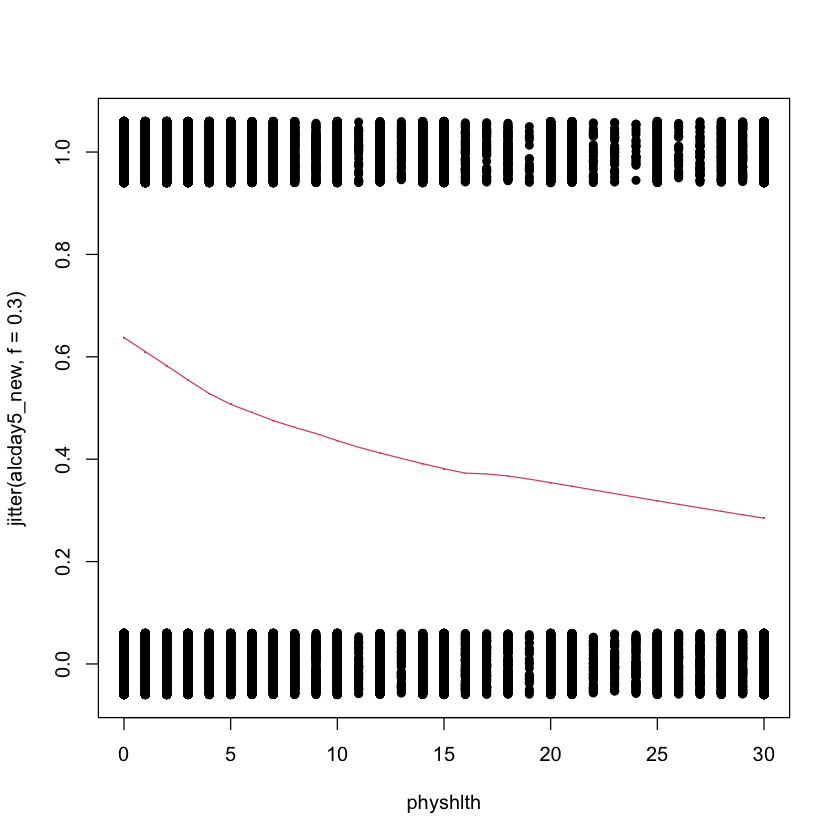

In [210]:
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16)
lines(lowess(mydata$physhlth,jitter(mydata$alcday5_new,f=0.3), ),col=2)

A) Prediction: There is a negative relationship between the explanatory variable "physhlth" and the response variable "alcday5_new", as people with poor physical health may be more cautious about the negative health consequences associated with excessive alcohol consumption.

B) Quantitative variable. The plot reveals a negative relationship between "physhlth" and "alcday5_new", suggesting that people with worse physical health tend to consume fewer alcoholic drinks.

### 2. Mental health

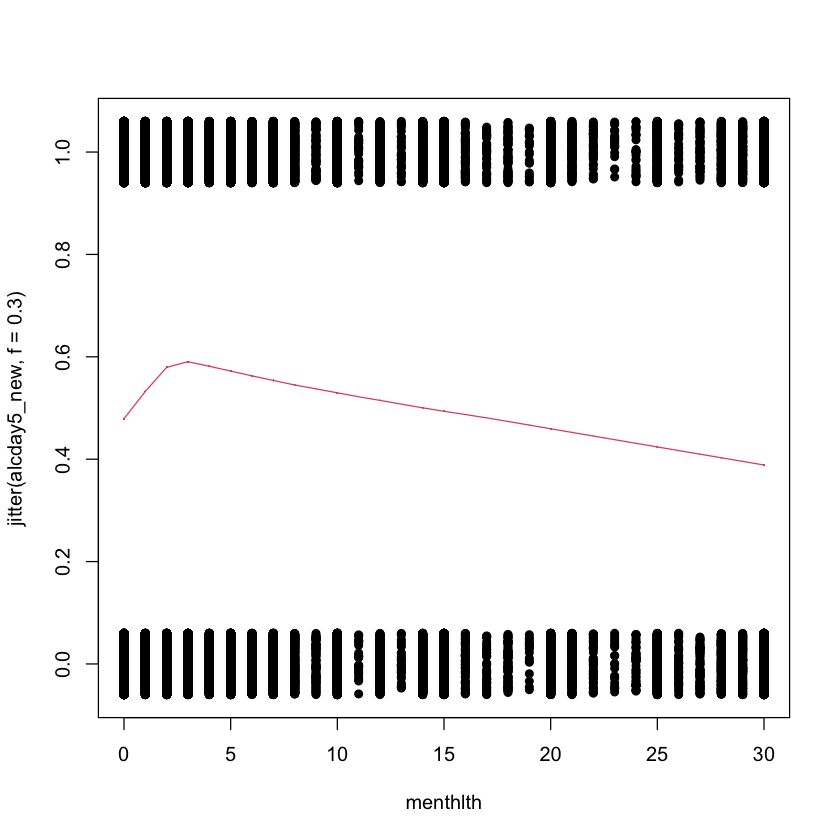

In [211]:
plot(jitter(alcday5_new,f=0.3) ~ menthlth, data=mydata, pch=16)
lines(lowess(mydata$menthlth,jitter(mydata$alcday5_new,f=0.3)),col=2)

A) Prediction: The explanatory variable "menthlth" has a negative relationship with the response variable "alcday5_new", as people with poor mental health may be more aware of the negative consequences associated with excessive alcohol use and therefore drink less frequently.

B) Quantitative variable. The plot suggests an overall negative relationship between "menthlth" and "alcday5_new", which supports my prediction. However, I notice a slight increase in alcohol consumption for people with "menthlth" scores between 0 and 4. It's possible that these people use alcohol as a coping mechanism for their mental health issues.

### 3. Poor health

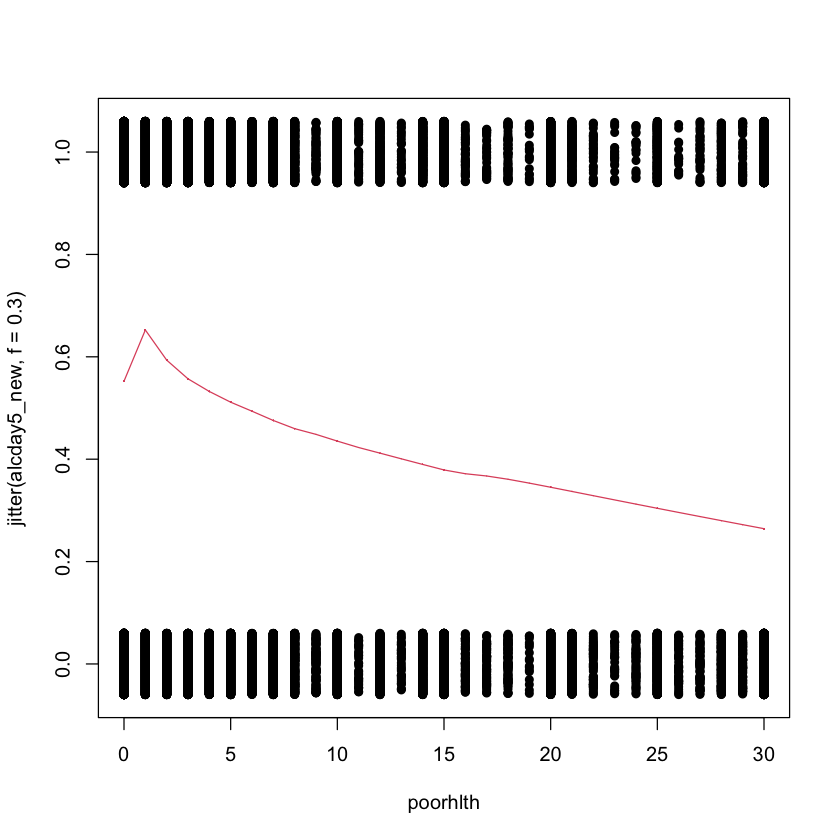

In [212]:
plot(jitter(alcday5_new,f=0.3) ~ poorhlth, data=mydata, pch=16)
lines(lowess(mydata$poorhlth,jitter(mydata$alcday5_new,f=0.3)),col=2)

A) Prediction: The explanatory variable "poorhlth" has a negative relationship with the response variable "alcday5_new". Similar reason as above explanatory variables.

B) Quantitative variable. The plot shows an overall negative relationship between "poorhlth" and "alcday5_new", indicating that people with poor health drink less alcohol. However, there is a slight increase in alcohol consumption between the poorhlth levels of 0 and 1.

### 4. Average amount of sleep

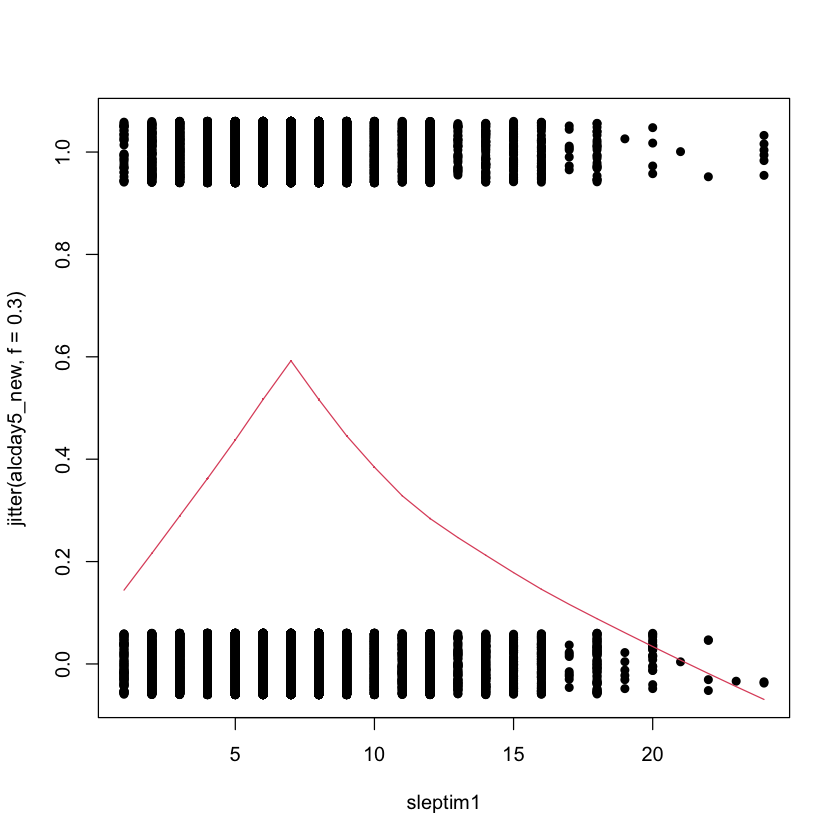

In [213]:
plot(jitter(alcday5_new,f=0.3) ~ sleptim1, data=mydata, pch=16)
lines(lowess(mydata$sleptim1,jitter(mydata$alcday5_new,f=0.3)),col=2)

A) Prediction: The explanatory variable "sleptim1" has a negative relationship with the response variable "alcday5_new", as people with less sleep time may be more likely to engage in behaviors associated with increased alcohol consumption, such as socializing late at night or attending parties and events where alcohol is present.

B) Quantitative variable. The plot shows that the value of "alcday5_new" initially rises and then falls as the variable "sleptim1" increases, reaching its peak when "sleptim7" equals 7. This trend suggests that people who sleep for shorter periods of time are more likely to consume alcohol, but only up to a certain point.

### 5. Marital status

In [214]:
marital.table <- prop.table(table(mydata$alcday5_new, mydata$marital), margin = 2);marital.table
chisqTest1 <- chisq.test(table(mydata$alcday5_new, mydata$marital))
print(chisqTest1)

   
      Married  Divorced   Widowed Separated Never married
  0 0.4627712 0.5309396 0.6620678 0.5494113     0.4400330
  1 0.5372288 0.4690604 0.3379322 0.4505887     0.5599670
   
    A member of an unmarried couple
  0                       0.3584965
  1                       0.6415035


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$marital)
X-squared = 4060.3, df = 5, p-value < 2.2e-16



A) Prediction: Marital status would be associated with alcohol consumption, with married people consuming less alcohol than unmarried people, since marriage often comes with greater family responsibilities and financial pressure.

B) Categorical variable. In terms of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different marital status, for "Married" it is 0.5372288; for "Divorced" it is 0.4690604; for "Widowed" it is 0.3379322; for "Separated" it is 0.4505887; for "Never married" it is 0.5599670, and for "A member of an unmarried couple" it is 0.6415035.

The Pearson's Chi-squared test indicates that there is a significant association between marital status and alcohol consumption (p-value < 2.2e-16). Therefore, marital status could be a good explanatory variable to use for predicting alcohol consumption in this population.

### 6. Education

In [215]:
education.table<- prop.table(table(mydata$alcday5_new, mydata$educa), margin = 2);education.table
chisqTest2 <- chisq.test(table(mydata$alcday5_new, mydata$educa))
print(chisqTest2)

   
    Never attended school or only kindergarten Grades 1 through 8 (Elementary)
  0                                  0.7472527                       0.7703075
  1                                  0.2527473                       0.2296925
   
    Grades 9 though 11 (Some high school)
  0                             0.6932373
  1                             0.3067627
   
    Grade 12 or GED (High school graduate)
  0                              0.5868326
  1                              0.4131674
   
    College 1 year to 3 years (Some college or technical school)
  0                                                    0.4934173
  1                                                    0.5065827
   
    College 4 years or more (College graduate)
  0                                  0.3623729
  1                                  0.6376271


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$educa)
X-squared = 9957.6, df = 5, p-value < 2.2e-16



A) Prediction: People with higher educational attainment may consume more alcohol than those with lower education levels.

B) Categorical variable. In terms of the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different education level, for "Never attended school or only kindergarten" it is 0.252747252747253; for "Grades 1 through 8 (Elementary)" it is 0.229692470837752; for "Grades 9 though 11 (Some high school)" it is 0.306762663923888; for "Grade 12 or GED (High school graduate)" it is 0.413167396763137; for "College 1 year to 3 years (Some college or technical school)" it is 0.506582743246787; and for "College 4 years or more (College graduate)" it is 0.637627093848292.

The Pearson's Chi-squared test statistic is 9957.6 with 5 degrees of freedom, and the p-value is less than 2.2e-16, indicating there is significant difference between different education levels. Therefore, education is a good explanatory variable to use to.

### 7. Income

In [216]:
income.table <- prop.table(table(mydata$alcday5_new, mydata$income2), margin = 2);income.table
chisqTest3 <- chisq.test(table(mydata$alcday5_new, mydata$income2))
print(chisqTest3)

   
    Less than $10,000 Less than $15,000 Less than $20,000 Less than $25,000
  0         0.6808511         0.6918387         0.6447040         0.5952381
  1         0.3191489         0.3081613         0.3552960         0.4047619
   
    Less than $35,000 Less than $50,000 Less than $75,000 $75,000 or more
  0         0.5456303         0.4761494         0.4112657       0.2986802
  1         0.4543697         0.5238506         0.5887343       0.7013198


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$income2)
X-squared = 15321, df = 7, p-value < 2.2e-16



A) Prediction: People with higher income drink more alcohol than people with lower income.

B) Categorical variable. The model indicates that income is significantly associated with alcday5_new (p-value < 0.05). The estimated coefficients for the other income levels represent the change in the log odds of drinking alcohol compared to the reference group "Less than $10,000". For example, holding all other predictor variables constant, the log odds of alcday5_new for an individual who earn less than 15,000 is 0.05104 less than for an individual who earn less than 10,000.


The Pearson's Chi-squared test statistic is 15321 with 7 degrees of freedom, and the p-value is less than 2.2e-16, indicating there is significant difference between different income levels. Therefore, income is a good explanatory variable to use to.

### 8. Sex/gender

In [217]:
gender.table <- prop.table(table(mydata$alcday5_new, mydata$sex), margin = 2);gender.table
chisqTest4 <- chisq.test(table(mydata$alcday5_new, mydata$sex))
print(chisqTest4)

   
         Male    Female
  0 0.4161938 0.5387398
  1 0.5838062 0.4612602


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(mydata$alcday5_new, mydata$sex)
X-squared = 2775.6, df = 1, p-value < 2.2e-16



A) Prediction: Females drink less alcohol than Males

B) Categorical variable. In terms of the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different sex/gender level, for "Male" it is 0.583806224642467, and for "Female" it is 0.461260246236243.

The Pearson's Chi-squared test statistic is 2775.6 with 1 degree of freedom, and the p-value is less than 2.2e-16, indicating there is significant difference between different income levels. Therefore, sex/gender is a good explanatory variable to use to.

<div class="alert alert-block alert-warning">
<a id="Logistic"></a>

# Logistic Regression Model


### Fit the final model 
Include a brief description of why this model is appropriate for the data.

In [218]:
# Fit your final model here.
# Use summary to get model co-efficients and other useful output.
final.model <- glm(alcday5_new ~ physhlth + marital * income2 + sex, data = mydata, family = "binomial"(link="logit"))
summary(final.model)


Call:
glm(formula = alcday5_new ~ physhlth + marital * income2 + sex, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0217  -1.0709   0.6548   1.0313   2.0959  

Coefficients:
                                                                 Estimate
(Intercept)                                                     -0.359662
physhlth                                                        -0.030152
maritalDivorced                                                  0.275525
maritalWidowed                                                  -0.370388
maritalSeparated                                                 0.233841
maritalNever married                                             0.550655
maritalA member of an unmarried couple                           0.687863
income2Less than $15,000                                        -0.090865
income2Less than $20,000                                         0.069009
incom

### Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command. Show the link function and describe how any categorical variables are encoded. (1.5 marks)

logit(alcday5_new) = -0.360 - 0.030physhlth + 0.276maritalDivorced - 0.370maritalWidowed + 0.234maritalSeparated + 0.551maritalNever married + 0.688maritalA member of an unmarried couple - 0.091income2Less than $15,000 + 0.069income2Less than $20,000 + 0.280income2Less than $25,000 + 0.488income2Less than $35,000 + 0.773income2Less than $50,000 + 1.034income2Less than $75,000 + 1.610income2$75,000 or more - 0.444sexFemale + 0.103maritalDivorced:income2Less than $15,000 + 0.114maritalWidowed:income2Less than $15,000 + 0.234maritalSeparated:income2Less than $15,000 + 0.152maritalNever married:income2Less than $15,000 + 0.325maritalA member of an unmarried couple:income2Less than $15,000 + 0.140maritalDivorced:income2Less than $20,000 + 0.201maritalWidowed:income2Less than $20,000 + 0.202maritalSeparated:income2Less than $20,000 + 0.208maritalNever married:income2Less than $20,000 + 0.175maritalA member of an unmarried couple:income2Less than $20,000 + 0.113maritalDivorced:income2Less than $25,000 + 0.339maritalWidowed:income2Less than $25,000 + 0.216maritalSeparated:income2Less than $25,000 + 0.165maritalNever married:income2Less than $25,000 + 0.131maritalA member of an unmarried couple:income2Less than $25,000 + 0.150maritalDivorced:income2Less than $35,000 + 0.329maritalWidowed:income2Less than $35,000 + 0.354maritalSeparated:income2Less than $35,000 + 0.035maritalNever married:income2Less than $35,000 + 0.095maritalA member of an unmarried couple:income2Less than $35,000 + 0.118maritalDivorced:income2Less than $50,000 + 0.433maritalWidowed:income2Less than $50,000 + 0.182maritalSeparated:income2Less than $50,000 - 0.074maritalNever married:income2Less than $50,000 + 0.095maritalA member of an unmarried couple:income2Less than $50,000 + 0.163maritalDivorced:income2Less than $75,000 + 0.499maritalWidowed:income2Less than $75,000 + 0.124maritalSeparated:income2Less than $75,000 - 0.115*maritalNever married:income2Less than $75

The link function is logit.

The reference values have been established for the categorical variables in the model. Specifically, the reference value for marital status is "married," the reference value for income is "Less than $10,000," and the reference value for sex is "Male".

### Create plots to visualize the model fit. (2.5 marks)

In [219]:
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 4800)

df_new <- as.data.frame(physhlth); df_new

df_new_6 <- rbind(df_new, df_new, df_new, df_new,df_new,df_new); df_new_6
df_new_2 <- rbind(df_new, df_new); df_new_2

sex <- c(rep("Male", 4800), rep("Female", 4800))
marital <- c(rep("Married", 1600), rep("Widowed", 1600),rep("Divorced", 1600),rep("Separated", 1600),rep("Never married", 1600),rep("A member of an unmarried couple",1600))
income2 <- c(rep("$75,000 or more", 1200), rep("Less than $75,000", 1200),rep("Less than $50,000", 1200),rep("Less than $10,000", 1200),rep("Less than $25,000", 1200),rep("Less than $20,000", 1200),
            rep("Less than $15,000", 1200),rep("Less than $35,000", 1200))

physhlth
<dbl>
0.000000000
0.006251302
0.012502605
0.018753907
0.025005209
0.031256512
0.037507814
0.043759116
0.050010419


physhlth
<dbl>
0.000000000
0.006251302
0.012502605
0.018753907
0.025005209
0.031256512
0.037507814
0.043759116
0.050010419


physhlth
<dbl>
0.000000000
0.006251302
0.012502605
0.018753907
0.025005209
0.031256512
0.037507814
0.043759116
0.050010419


In [220]:
is.vector(sex)
is.vector(marital)
is.vector(income2)

[1] TRUE

[1] TRUE

[1] TRUE

In [221]:
sex <- as.data.frame(sex)
marital <- as.data.frame(marital)
income2 <- as.data.frame(income2)

new.data <- cbind(xnew.df.2, sex, marital, income2)
head(new.data)

names(new.data) <- c("physhlth", "sex", "marital", "income2")

str(new.data)
new.data$sex <- as.factor(new.data$sex)
new.data$marital <- as.factor(new.data$marital)
new.data$income2 <- as.factor(new.data$income2)

,physhlth,sex,marital,income2
,<dbl>,<chr>,<chr>,<chr>
1,0.0000000,Male,Married,"$75,000 or more"
2,0.3030303,Male,Married,"$75,000 or more"
3,0.6060606,Male,Married,"$75,000 or more"
4,0.9090909,Male,Married,"$75,000 or more"
5,1.2121212,Male,Married,"$75,000 or more"
6,1.5151515,Male,Married,"$75,000 or more"


'data.frame':	9600 obs. of  4 variables:
 $ physhlth: num  0 0.303 0.606 0.909 1.212 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


In [222]:
ynew <- predict(final.model, data.frame(new.data), type="response")

new.data.2 <- cbind(new.data, ynew)

# Subset the new data into the different genders
mydata.sex.female <- subset(new.data.2, new.data.2$sex == "Female")
mydata.sex.male <- subset(new.data.2, new.data.2$sex == "Male")

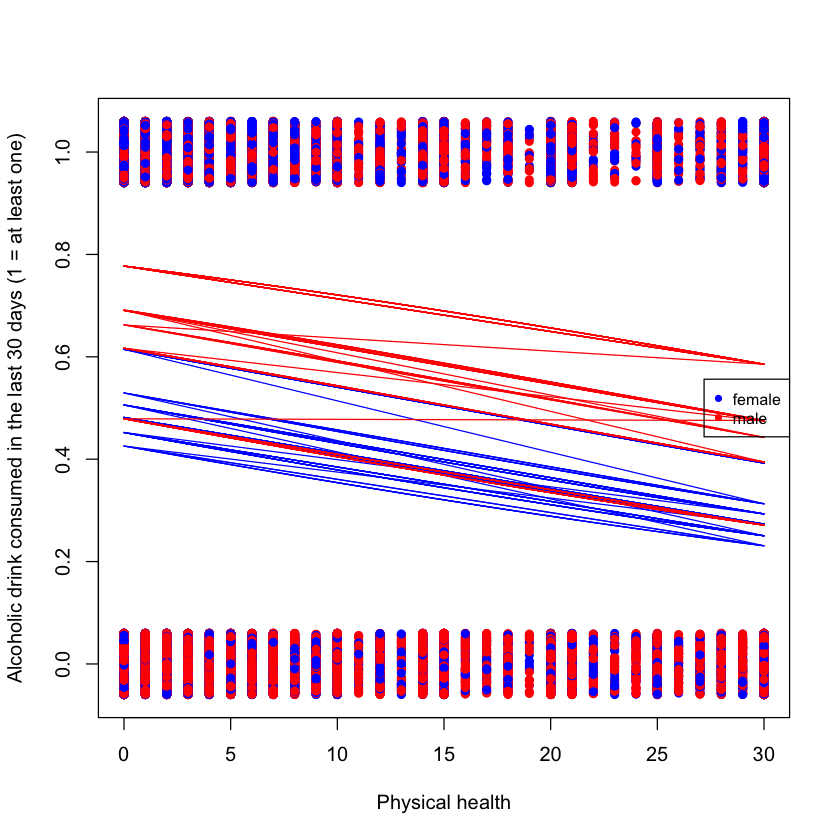

In [223]:
# Plot the data and model fit with color coding
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16, xlab='Physical health', col = c("blue", "red")[as.factor(mydata$sex)],ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)")
lines(mydata.sex.female$physhlth, mydata.sex.female$ynew, lty=1, col="blue")
lines(mydata.sex.male$physhlth, mydata.sex.male$ynew, lty=1, col="red")
legend("right", legend=c("female", "male"),
       col=c("blue","red"), pch=16,cex=0.8)

In [224]:
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 120)

xnew.df <- as.data.frame(physhlth); xnew.df
xnew.df.6 <- rbind(xnew.df, xnew.df, xnew.df, xnew.df,xnew.df,xnew.df); xnew.df.6
sex <- c(rep("Male", 360), rep("Female", 360))
marital <- c(rep("Married", 120), rep("Widowed", 120),rep("Divorced", 120),rep("Separated", 120),rep("Never married", 120),rep("A member of an unmarried couple",120))
income2 <- c(rep("$75,000 or more", 90), rep("Less than $75,000", 90),rep("Less than $50,000", 90),rep("Less than $10,000", 90),rep("Less than $25,000", 90),rep("Less than $20,000", 90),
            rep("Less than $15,000", 90),rep("Less than $35,000", 90))
new3 <- cbind(xnew.df.6, sex, marital, income2)
names(new3) <- c("physhlth", "sex", "marital", "income2")
str(new3)
ynew3 <- predict(final.model, data.frame(new3), type="response")
new3 <- cbind(new3, ynew3)

mydata.m1 <- subset(new3, new3$marital == "Married" )
mydata.m2 <- subset(new3, new3$marital == "Divorced")
mydata.m3 <- subset(new3, new3$marital == "Widowed")
mydata.m4 <- subset(new3, new3$marital == "Separated")
mydata.m5 <- subset(new3, new3$marital == "Never married")
mydata.m6 <- subset(new3, new3$marital == "A member of an unmarried couple")

physhlth
<dbl>
0.0000000
0.2521008
0.5042017
0.7563025
1.0084034
1.2605042
1.5126050
1.7647059
2.0168067


physhlth
<dbl>
0.0000000
0.2521008
0.5042017
0.7563025
1.0084034
1.2605042
1.5126050
1.7647059
2.0168067


'data.frame':	720 obs. of  4 variables:
 $ physhlth: num  0 0.252 0.504 0.756 1.008 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


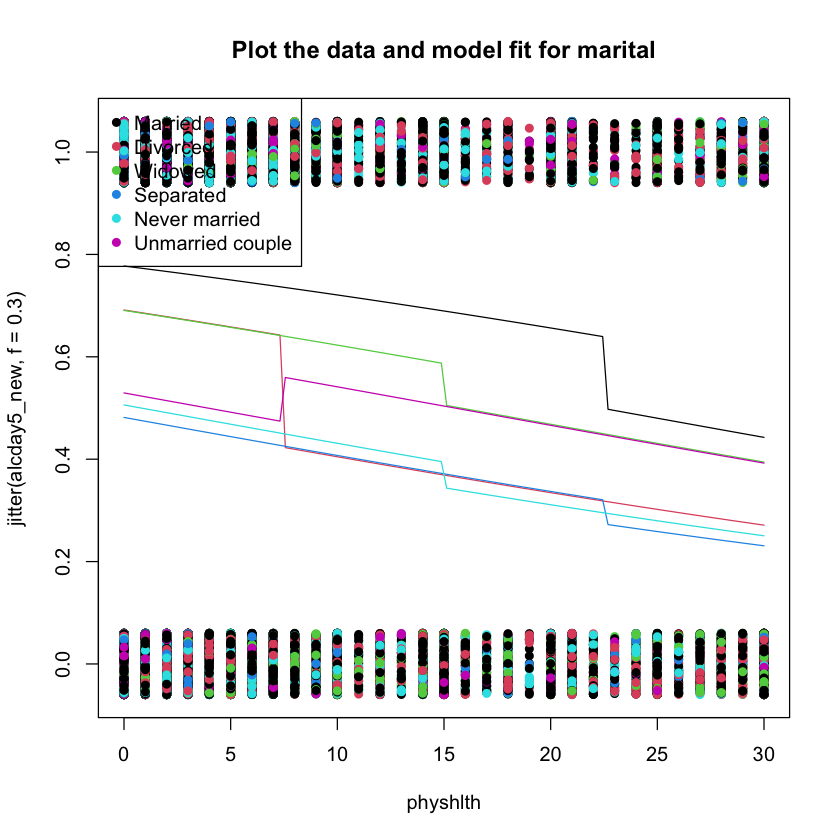

In [225]:
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16, col = c(1,2,3,4,5,6)[as.factor(mydata$marital)],
    main = 'Plot the data and model fit for marital')
lines(mydata.m1$physhlth, mydata.m1$ynew3, lty=1, col=1)
lines(mydata.m2$physhlth, mydata.m2$ynew3, lty=1, col=2)
lines(mydata.m3$physhlth, mydata.m3$ynew3, lty=1, col=3)
lines(mydata.m4$physhlth, mydata.m4$ynew3, lty=1, col=4)
lines(mydata.m5$physhlth, mydata.m5$ynew3, lty=1, col=5)
lines(mydata.m6$physhlth, mydata.m6$ynew3, lty=1, col=6)
legend("topleft", legend=c("Married", "Divorced", "Widowed", "Separated","Never married","Unmarried couple"),
       col=c(1,2,3,4,5,6), pch=16)

In [226]:
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 120)
xnew.df <- as.data.frame(physhlth); xnew.df
xnew.df.8 <- rbind(xnew.df, xnew.df, xnew.df, xnew.df,xnew.df,xnew.df,xnew.df,xnew.df); xnew.df.8
sex <- c(rep("Male", 480), rep("Female", 480))
marital <- c(rep("Married", 160), rep("Widowed", 160),rep("Divorced", 160),rep("Separated", 160),rep("Never married", 160),rep("A member of an unmarried couple",160))
income2 <- c(rep("$75,000 or more", 120), rep("Less than $75,000", 120),rep("Less than $50,000", 120),rep("Less than $10,000", 120),rep("Less than $25,000", 120),rep("Less than $20,000", 120),
            rep("Less than $15,000", 120),rep("Less than $35,000", 120))
new4 <- cbind(xnew.df.8, sex, marital, income2)
names(new4) <- c("physhlth", "sex", "marital", "income2")
str(new4)
ynew4 <- predict(final.model, data.frame(new4), type="response")
new4 <- cbind(new4, ynew4)


mydata.i1 <- subset(new4, new4$income2 == "Less than $10,000" )
mydata.i2 <- subset(new4, new4$income2 == "Less than $15,000")
mydata.i3 <- subset(new4, new4$income2 == "Less than $20,000")
mydata.i4 <- subset(new4, new4$income2 == "Less than $25,000")
mydata.i5 <- subset(new4, new4$income2 == "Less than $35,000")
mydata.i6 <- subset(new4, new4$income2 == "Less than $50,000")
mydata.i7 <- subset(new4, new4$income2 == "Less than $75,000")
mydata.i8 <- subset(new4, new4$income2 == "$75,000 or more")

physhlth
<dbl>
0.0000000
0.2521008
0.5042017
0.7563025
1.0084034
1.2605042
1.5126050
1.7647059
2.0168067


physhlth
<dbl>
0.0000000
0.2521008
0.5042017
0.7563025
1.0084034
1.2605042
1.5126050
1.7647059
2.0168067


'data.frame':	960 obs. of  4 variables:
 $ physhlth: num  0 0.252 0.504 0.756 1.008 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


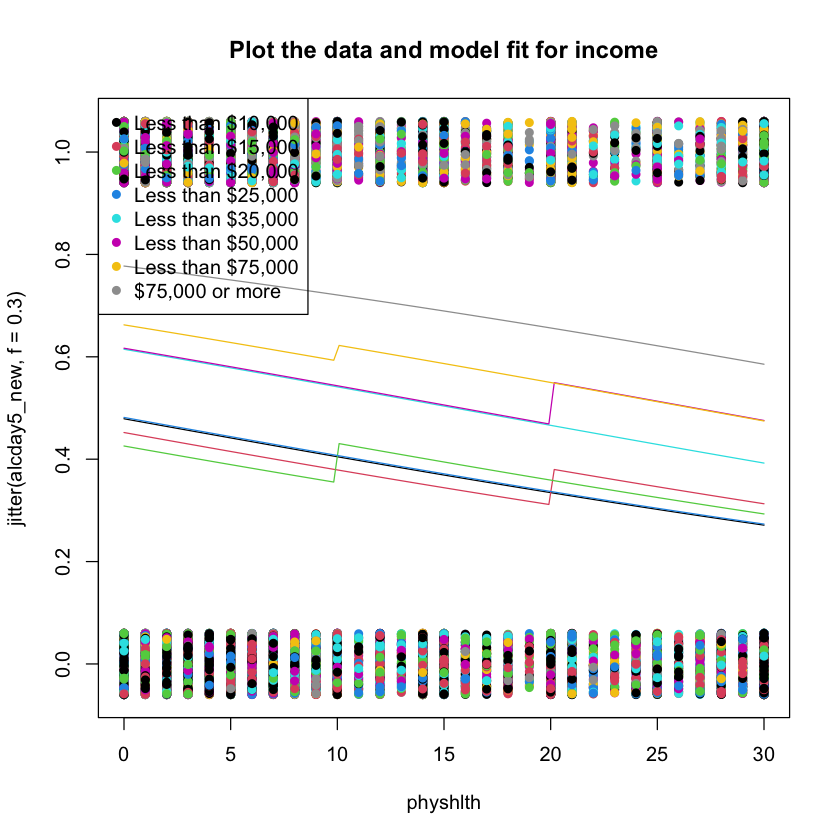

In [227]:
# Plot the data and model fit with color coding
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16, col = c(1,2,3,4,5,6,7,8)[as.factor(mydata$income2)], main = 'Plot the data and model fit for income')
lines(mydata.i1$physhlth, mydata.i1$ynew4, lty=1, col=1)
lines(mydata.i2$physhlth, mydata.i2$ynew4, lty=1, col=2)
lines(mydata.i3$physhlth, mydata.i3$ynew4, lty=1, col=3)
lines(mydata.i4$physhlth, mydata.i4$ynew4, lty=1, col=4)
lines(mydata.i5$physhlth, mydata.i5$ynew4, lty=1, col=5)
lines(mydata.i6$physhlth, mydata.i6$ynew4, lty=1, col=6)
lines(mydata.i7$physhlth, mydata.i7$ynew4, lty=1, col=7)
lines(mydata.i8$physhlth, mydata.i8$ynew4, lty=1, col=8)
legend("topleft", legend=c("Less than $10,000","Less than $15,000", "Less than $20,000", "Less than $25,000", "Less than $35,000", "Less than $50,000", "Less than $75,000", "$75,000 or more"),
       col=c(1,2,3,4,5,6,7,8), pch=16)

### What are the main results of your model?

The main results of the model are as follows:

Physical health is negatively related to alcohol consumption, while mental health and poor health are first positively related and then quickly become negative related to alcohol consumption. Less sleep time is positively associated with alcohol consumption. Overall, the worse the physical health or mental health is, the less likely they will consume alcohol. They might be more aware of the negative consequences associated with excessive alcohol use and therefore drink less frequently.

Gender is a significant factor, with women being less likely to drink than men.

Income level is positively related to alcohol consumption. Marital status is a significant factor, with married people consuming less alcohol than unmarried people, as marriage often comes with greater family responsibilities and financial pressure. Those who are divorced, separated, or never married have a positive relationship with alcohol consumption. Widowed individuals have a negative relationship with drinking. There is a positive interaction between marital status and income, indicating that the effect of marital status on alcohol consumption increases as income increases.

---
## Any concerns about the explanatory variables being related to each other?

Based on the Variance Inflation Factor (VIF) score, we can conclude that there is no significant associations between explanatory variables. Nonetheless, it was observed that poor health and mental health have a high correlation, and as a result, these variables were excluded from the final model.

In [229]:
library(car)
vif(final.model)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
physhlth,1.063688e+00,1,1.031352
marital,1.798926e+05,5,3.353523
income2,2.577960e+03,7,1.752518
sex,1.025813e+00,1,1.012824
marital:income2,5.044027e+07,35,1.288367


## Classification table 

Cut-off value of 0.48 is used to maximize the accuracy.

In [230]:
df <- data.frame(matrix(ncol = 9, nrow = 51))
colnames(df) <- c("true.positive", "true.negative", "false.positive", "false.negative", "correct.percent", "sensitivity", "specificity", "false.pos.rate", "false.neg.rate")
head(df)

,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [231]:
prob.level <- seq(0, 1, length.out=51) # create a vector with different possible probabilities
prob.level
class.table.data <- cbind(prob.level, df) # combine your vector of probabilities and your empty dataframe
head(class.table.data) # Your dataframe has one row for each probability cut-off

[1] 0.00 0.02 0.04 0.06 0.08 0.10 0.12 0.14 0.16 0.18 0.20 0.22 0.24 0.26 0.28
[16] 0.30 0.32 0.34 0.36 0.38 0.40 0.42 0.44 0.46 0.48 0.50 0.52 0.54 0.56 0.58
[31] 0.60 0.62 0.64 0.66 0.68 0.70 0.72 0.74 0.76 0.78 0.80 0.82 0.84 0.86 0.88
[46] 0.90 0.92 0.94 0.96 0.98 1.00

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,0.02,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,0.04,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,0.06,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,0.08,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,0.10,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [232]:
# fill empty cells in your dataframe with 0
class.table.data$true.positive <- rep(c(0), c(51))
class.table.data$true.negative <- rep(c(0), c(51))
class.table.data$false.positive <- rep(c(0), c(51))
class.table.data$false.negative <- rep(c(0), c(51))
head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,0,0,0,0,NA,NA,NA,NA,NA
2,0.02,0,0,0,0,NA,NA,NA,NA,NA
3,0.04,0,0,0,0,NA,NA,NA,NA,NA
4,0.06,0,0,0,0,NA,NA,NA,NA,NA
5,0.08,0,0,0,0,NA,NA,NA,NA,NA
6,0.10,0,0,0,0,NA,NA,NA,NA,NA


In [233]:
# This loop will try out the different probability cut-off values and fill in how many true positive/negatives and false positive/negatives you have based on your data.
for (i in 1:51) {
class.table <- table(mydata$alcday5_new, fitted(final.model) > class.table.data$prob.level[i])

col.true.num <- grep("TRUE", colnames(class.table))
col.false.num <- grep("FALSE", colnames(class.table))

if (length(col.true.num) > 0) {
      class.table.data$false.positive [i] <- class.table[1, col.true.num]
      class.table.data$true.positive [i] <- class.table[2, col.true.num] }

if (length(col.false.num) > 0) {
      class.table.data$true.negative [i] <- class.table[1, col.false.num]
      class.table.data$false.negative [i] <- class.table[2, col.false.num] }  }

head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,99809,0,96864,0,NA,NA,NA,NA,NA
2,0.02,99809,0,96864,0,NA,NA,NA,NA,NA
3,0.04,99809,0,96864,0,NA,NA,NA,NA,NA
4,0.06,99809,0,96864,0,NA,NA,NA,NA,NA
5,0.08,99809,0,96864,0,NA,NA,NA,NA,NA
6,0.10,99809,0,96864,0,NA,NA,NA,NA,NA


In [234]:
# You will use this information to fill in the rest of your classification table.
class.table.data$correct.percent <- (class.table.data$true.positive + class.table.data$true.negative)/nrow(mydata)*100
class.table.data$sensitivity <- (class.table.data$true.positive)/sum(mydata$alcday5_new)*100
class.table.data$specificity <- (class.table.data$true.negative)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data$false.neg.rate <- (class.table.data$false.negative)/sum(mydata$alcday5_new)*100
class.table.data$false.pos.rate <- (class.table.data$false.positive)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data

prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.02,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.04,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.06,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.08,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.10,99809,0,96864,0,50.74870,100.0000000,0.000000,100.00000000,0.0000000
0.12,99617,1270,95594,192,51.29682,99.8076326,1.311117,98.68888338,0.1923674
0.14,99594,1386,95478,215,51.34411,99.7845886,1.430872,98.56912785,0.2154114
0.16,99330,2969,93895,479,52.01477,99.5200834,3.065122,96.93487777,0.4799166


In [235]:
max_correct_percent_row <- which.max(class.table.data$correct.percent);max_correct_percent_row
max_correct_percent_cutoff <- class.table.data$prob.level[max_correct_percent_row]; max_correct_percent_cutoff


[1] 25

[1] 0.48

## ROC curve + AUC

The AUC value of the logistic regression model is 0.701973552821287. This value is considered acceptable for discrimination performance, as an AUC value between 0.7 and 0.8 is typically regarded as moderate. The model has the ability to differentiate between individuals who consume alcohol and those who do not. However, the sensitivity of the model can still be improved, as it may not accurately identify all true positive cases.

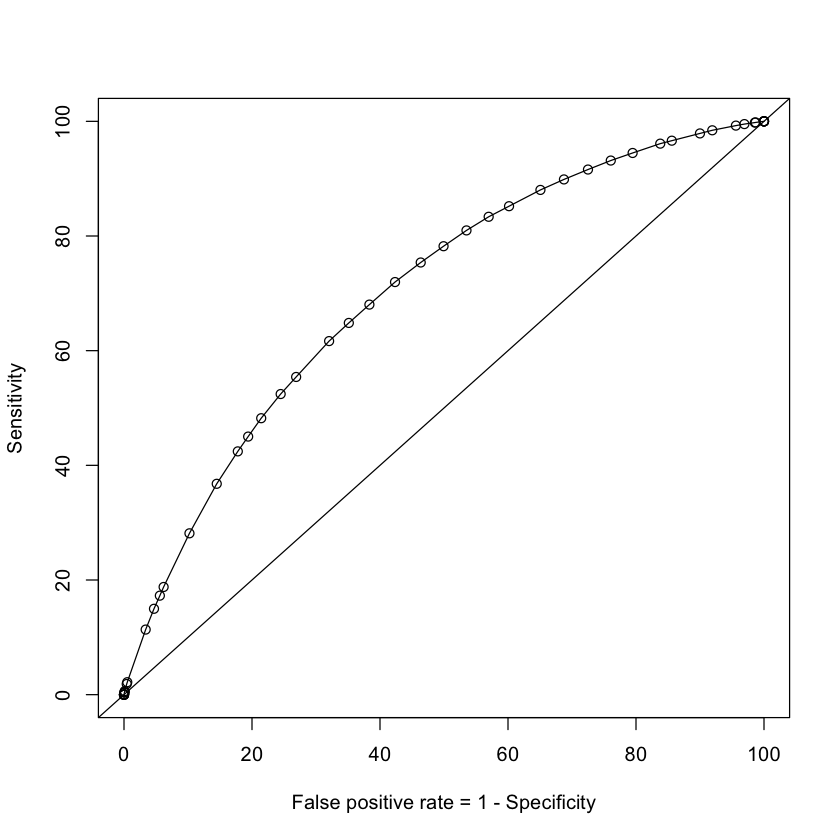

In [236]:
# Create the ROC curve
plot(class.table.data$sensitivity ~ class.table.data$false.pos.rate, data=class.table.data, ylab = "Sensitivity", xlab = "False positive rate = 1 - Specificity")
lines(sensitivity ~ false.pos.rate, data=class.table.data)
abline(0, 1)

In [278]:
# Find the AUC (area under the curve) value.
install.packages("zoo")
library(zoo)


The downloaded binary packages are in
	/var/folders/xm/7t52cybs4dd6d9x6061n65m40000gn/T//Rtmp1xw7ev/downloaded_packages



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [279]:
x <- class.table.data$false.pos.rate/100
y <- class.table.data$sensitivity/100
id <- order(x)

AUC <- sum(diff(x[id])*rollmean(y[id],2)); AUC # average of left and right to create rectangle; then take sum of all the pieces

[1] 0.7019736

<div class="alert alert-block alert-warning">
<a id="Data_prep2"></a>

# Data preparation for Poisson regression
</div>

In [238]:
poisson_data <- mydata[mydata$alcday5 > 0, ]
head(poisson_data)
nrow(poisson_data)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5,alcday5_new
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
3,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20,1
4,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0,1
5,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0,1
8,5,0,10,6,Widowed,College 1 year to 3 years (Some college or technical school),"Less than $50,000",Female,202,0,1
11,0,1,0,6,Married,College 4 years or more (College graduate),"$75,000 or more",Male,205,0,1
19,3,3,0,6,Married,Grade 12 or GED (High school graduate),"$75,000 or more",Female,201,0,1


[1] 99809

How many observations are in this new dataset?

There are 99809 observations in this dataset.

## Exploring the response variable


The focus of this analysis is to examine variables associated with consuming more than the recommended maximum of alcohol. The focus is only on individuals who have consumed at least one alcohol drink in the past 30 days (this helps remove excess 0's). The variable `drnk3ge5` will be used as the response variable. 

In [239]:
install.packages("MASS")
library(MASS)


The downloaded binary packages are in
	/var/folders/xm/7t52cybs4dd6d9x6061n65m40000gn/T//Rtmp1xw7ev/downloaded_packages


In [240]:
fit <- fitdistr(poisson_data$drnk3ge5, "poisson")

In [241]:
chisq.test(table(dpois(poisson_data$drnk3ge5, fit$estimate)))


	Chi-squared test for given probabilities

data:  table(dpois(poisson_data$drnk3ge5, fit$estimate))
X-squared = 1542553, df = 30, p-value < 2.2e-16


The p-value is less than 0.05 so we reject the hypothesis that the data follows a Poisson distribution.

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Predictions and Exploratory Data Analysis for Poisson Regression

    
A) What is your prediction for the relationship between the explanatory variable and the response variable?

B1) If quantitative, visualize the relationship using a scatterplot with a lowess line. What relationship do you see on the plot?

B2) If categorical, what is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for EACH category level? Are there differences that indicate that this could be a good explanatory variable to use?
</div>

### 1. Physical health

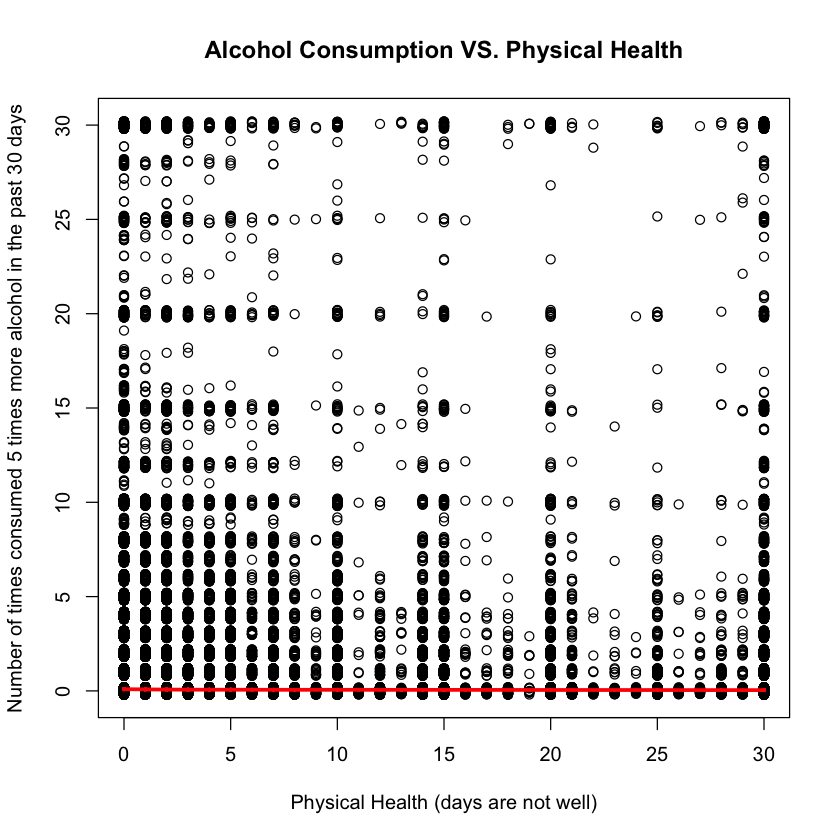

In [242]:
plot(jitter(drnk3ge5, f=1) ~ physhlth, data = poisson_data,
    main = "Alcohol Consumption VS. Physical Health",
    xlab = "Physical Health (days are not well)",
    ylab = "Number of times consumed 5 times more alcohol in the past 30 days")
lines(lowess(poisson_data$physhlth, poisson_data$drnk3ge5), lwd=3, col="red")

A) Prediction: The number of days of poor physical health has a positive relationship with the count of heavy drinking occasions.

B) Quantitative. The scatterplot with a lowess line appears that there is no relationship between the number of days with poor physical health and the count of heavy drinking occasions. The data points seem to be spread out and not follow any particular trend as the number of days with poor physical health increases.

### 2. Mental health

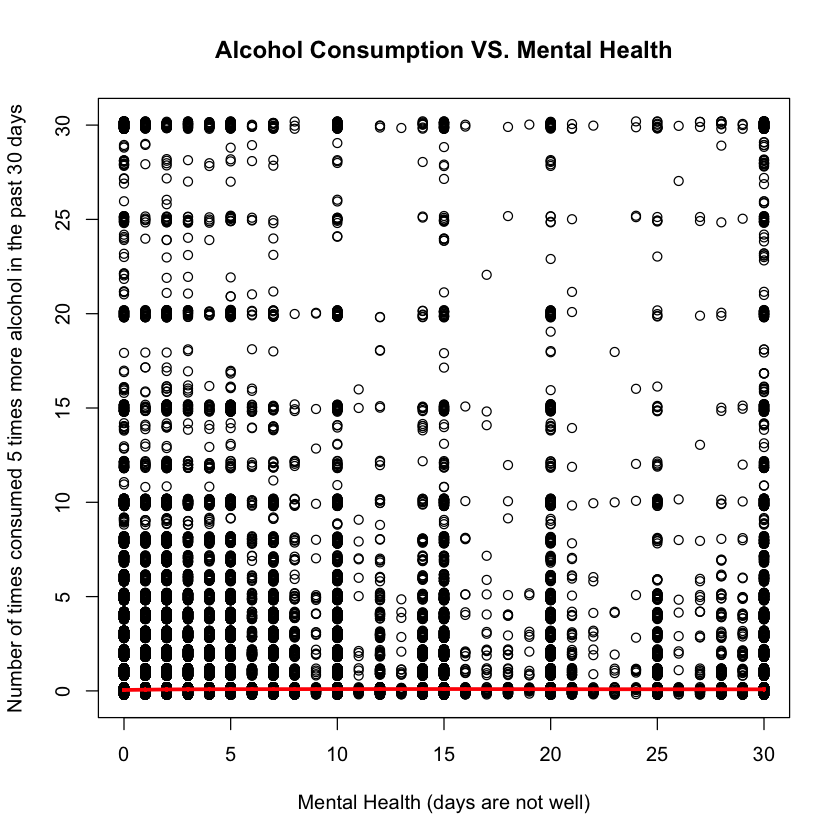

In [243]:
plot(jitter(drnk3ge5, f=1) ~ menthlth, data = poisson_data,
    main = "Alcohol Consumption VS. Mental Health",
    xlab = "Mental Health (days are not well)",
    ylab = "Number of times consumed 5 times more alcohol in the past 30 days")
lines(lowess(poisson_data$menthlth, poisson_data$drnk3ge5), lwd=3, col="red")

A) Prediction: The number of days of poor mental health has a positive relationship with the count of heavy drinking occasions.

B) Quantitative. The scatterplot with a lowess line appears a very slightly positive relationship between the number of days of poor mental health and the count of heavy drinking occasions. Specifically, as the number of days of poor mental health increases, the count of heavy drinking occasions also tends to increase.

### 3. Poor health

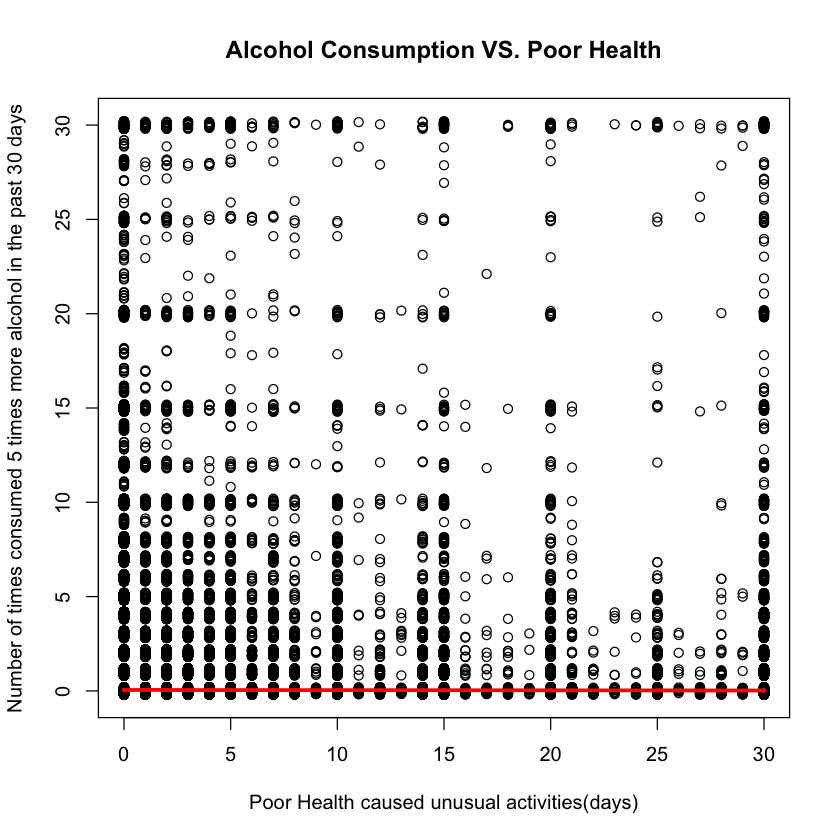

In [244]:
plot(jitter(drnk3ge5, f=1) ~ poorhlth, data = poisson_data,
    main = "Alcohol Consumption VS. Poor Health",
    xlab = "Poor Health caused unusual activities(days)",
    ylab = "Number of times consumed 5 times more alcohol in the past 30 days")
lines(lowess(poisson_data$poorhlth, poisson_data$drnk3ge5), lwd=3, col="red")

A) Prediction: The number of days of poor health that kept people from doing their usual activities has a positive relationship with the count of heavy drinking occasions.

B) Quantitative. The scatterplot with a lowess line appears a slight positive relationship between the count of heavy drinking occasions and the number of days that individuals were unable to perform their usual activities due to poor health. As the number of days increases, there is a slight increase in the count of heavy drinking occasions.

### 4. Average amount of sleep

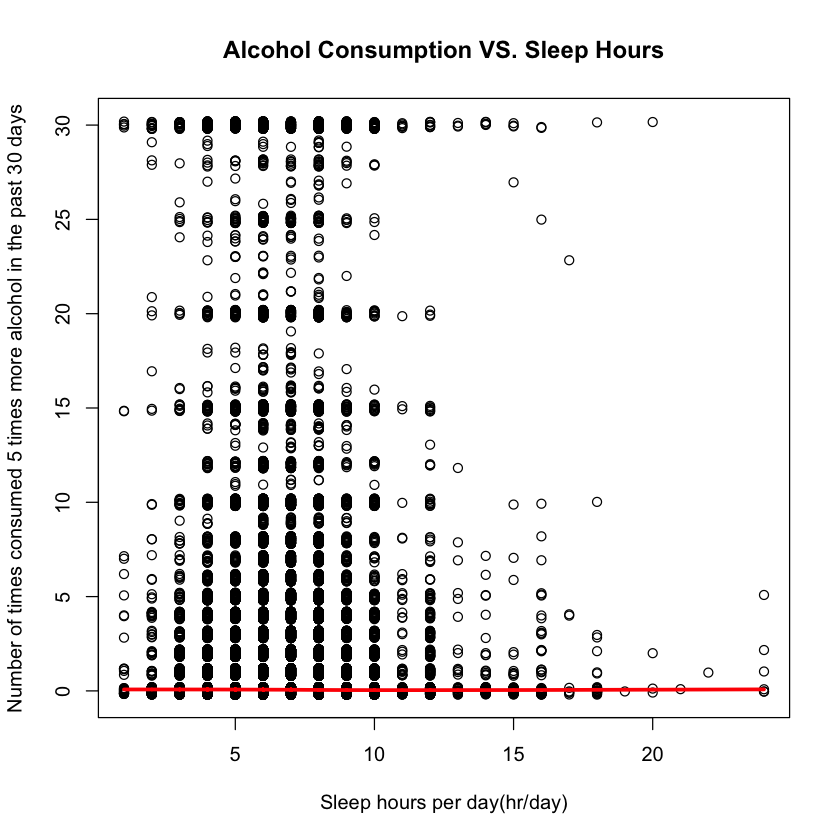

In [245]:
plot(jitter(drnk3ge5, f=1) ~ sleptim1, data = poisson_data,
    main = "Alcohol Consumption VS. Sleep Hours",
    xlab = "Sleep hours per day(hr/day)",
    ylab = "Number of times consumed 5 times more alcohol in the past 30 days")
lines(lowess(poisson_data$sleptim1, poisson_data$drnk3ge5), lwd=3, col="red")

A) Prediction: The number of hours of sleep an individual gets in a 24-hour period has a negative relationship with the count of heavy drinking occasions.

B) Quantitative. The scatterplot with a lowess line appears that there is a negative relationship between the number of hours of sleep an individual gets in a 24-hour period and the count of heavy drinking occasions. As the number of hours of sleep decreases, there is an increase in the count of heavy drinking occasions.

### 5. Marital status

In [246]:
library(dplyr)

In [247]:
poisson_data %>%
  group_by(marital) %>%
  summarize(mean_alc = mean(drnk3ge5),
            n = n()) 

marital,mean_alc,n
<fct>,<dbl>,<int>
Married,0.9022971,51892
Divorced,1.5140076,15206
Widowed,0.7790698,7740
Separated,1.7121932,2526
Never married,1.9256635,18349
A member of an unmarried couple,1.7077637,4096


A) Prediction: Marital status has a relationship with the count of heavy drinking occasions. People who married may use less alcohol.

B) The mean value of heavy drinkers varies across different marital status categories, indicating that marital status may be a good explanatory variable to use.

The values are as follows:
Married:0.9022971	
Divorced:1.5140076	
Widowed:0.7790698	
Separated:1.7121932	
Never married:1.9256635
A member of an unmarried couple:1.7077637

### 6. Education

In [248]:
poisson_data %>%
  group_by(educa) %>%
  summarize(mean_alc = mean(drnk3ge5),
            n = n()) 

educa,mean_alc,n
<fct>,<dbl>,<int>
Never attended school or only kindergarten,1.5217391,46
Grades 1 through 8 (Elementary),2.1191136,1083
Grades 9 though 11 (Some high school),2.2215703,3579
Grade 12 or GED (High school graduate),1.6635614,22542
College 1 year to 3 years (Some college or technical school),1.3079658,28974
College 4 years or more (College graduate),0.8446713,43585


A) Prediction: Education level has a negative relationship with the count of heavy drinking occasions.

B) The mean value of heavy drinkers varies across different education categories, indicating that education may be a good explanatory variable to use.

The values are as follows:
Never attended school or only kindergarten:1.5217391	
Grades 1 through 8 (Elementary): 2.1191136	
Grades 9 though 11 (Some high school):2.2215703	
Grade 12 or GED (High school graduate):1.6635614	
College 1 year to 3 years (Some college or technical school): 1.3079658	
College 4 years or more (College graduate): 0.8446713

### 7. Income

In [249]:
poisson_data %>%
  group_by(income2) %>%
  summarize(mean_alc = mean(drnk3ge5),
            n = n()) 

income2,mean_alc,n
<fct>,<dbl>,<int>
"Less than $10,000",2.1182390,4770
"Less than $15,000",1.7915337,4701
"Less than $20,000",1.5696377,6541
"Less than $25,000",1.4183794,8466
"Less than $35,000",1.3427135,10341
"Less than $50,000",1.2270296,14584
"Less than $75,000",1.0742664,17141
"$75,000 or more",0.9479333,33265


A) Prediction: Income has a negative relationship with the count of heavy drinking occasions.

B) The mean value of heavy drinkers varies across different income categories, indicating that income may be a good explanatory variable to use.

### 8. Sex/gender

In [250]:
poisson_data %>%
  group_by(sex) %>%
  summarize(mean_alc = mean(drnk3ge5),
            n = n()) 

sex,mean_alc,n
<fct>,<dbl>,<int>
Male,1.8018332,43312
Female,0.7874223,56497


A) Prediction:Female would be less likely to buy alcohol and at a lower frequency than male.

B) There are significant differences in the mean value of heavy drinkers between male and female, suggesting that sex may be a good explanatory variable to use.

The values are as follows:
Male	1.8018332
Female	0.7874223	

<div class="alert alert-block alert-warning">
<a id="Poisson"></a>
    
# Poisson Regression model

</div>    

### Fit final model 
Include a brief description of why this model is appropriate for the data.

The Poisson regression model developed is suitable for predicting the frequency of heavy drinking within the last 30 days based on various explanatory variables, such as income level, sex, and mental health. The model accounts for the interaction effect between sex and mental health to prevent bias. The model exhibits a statistically significant AIC value, which is the lowest among all the other models considered, indicating its strong performance. The majority of the explanatory variables have p-values that are significant, further indicating their predictive value for alcohol consumption.

In [251]:
# Fit your final model here.
# Use summary to get model co-efficients and other useful output.

poisson_final <- glm(drnk3ge5 ~  menthlth + sex*marital + income2, data = poisson_data, family = 'poisson'(link='log'))
summary(poisson_final)


Call:
glm(formula = drnk3ge5 ~ menthlth + sex * marital + income2, 
    family = poisson(link = "log"), data = poisson_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3503  -1.5147  -1.1136  -0.5599  13.9385  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                       0.3723206  0.0126567  29.417
menthlth                                          0.0266996  0.0002714  98.392
sexFemale                                        -0.7849983  0.0096069 -81.712
maritalDivorced                                   0.4907993  0.0104301  47.056
maritalWidowed                                    0.0185451  0.0190331   0.974
maritalSeparated                                  0.5406321  0.0201074  26.887
maritalNever married                              0.5516544  0.0091148  60.523
maritalA member of an unmarried couple            0.4793438  0.0166803  28.737
income2Less than $15,000          

### Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command. Show the link function and describe how any categorical variables are encoded.

log(E(drnk3ge5)) = 0.3723 + 0.0267 * menthlth + 0.4908 * maritalDivorced + 0.0185 * maritalWidowed + 0.5406 * maritalSeparated + 0.5517 * maritalNever_married + 0.4793 * maritalUnmarried_couple - 0.7850 * sexFemale - 0.0919 * income2_15K - 0.1580 * income2_20K - 0.1801 * income2_25K - 0.1815 * income2_35K - 0.2210 * income2_50K - 0.2891 * income2_75K - 0.3321 * income2_75K_more - 0.2409 * maritalDivorced*sexFemale - 0.2701 * maritalWidowed*sexFemale - 0.2883 * maritalSeparated*sexFemale + 0.0646 * maritalNever_married*sexFemale + 0.1357 * maritalUnmarried_couple*sexFemale

The link function is log.

In a Poisson regression model with a log link function, the predictor variables are used to model the natural logarithm of the expected count (mean) as a linear combination. In the current analysis, the income2 variable, representing the annual household income of respondents, was converted to a factor with eight distinct categories to allow for appropriate statistical analysis. Similarly, the sex variable, with two categories ("Male" and "Female"), was also converted to a factor. This conversion ensures that R treats the categories as separate levels during analysis. The marital variable, representing the marital status of respondents, was also encoded as a factor with six distinct categories to ensure that R understands the unique nature of each category and processes them accordingly during modeling.

### What is the value for residual deviance/df? What does this indicate for the model?

In [252]:
(poisson_final$deviance) / (poisson_final$df.residual)

[1] 4.097101

A measure of how well the model fits the data is the deviance divided by the residual degrees of freedom (df). The calculated value for this model is 4.09, indicating that the model has a reasonably good fit to the data.

### Create plots to visualize the model fit.

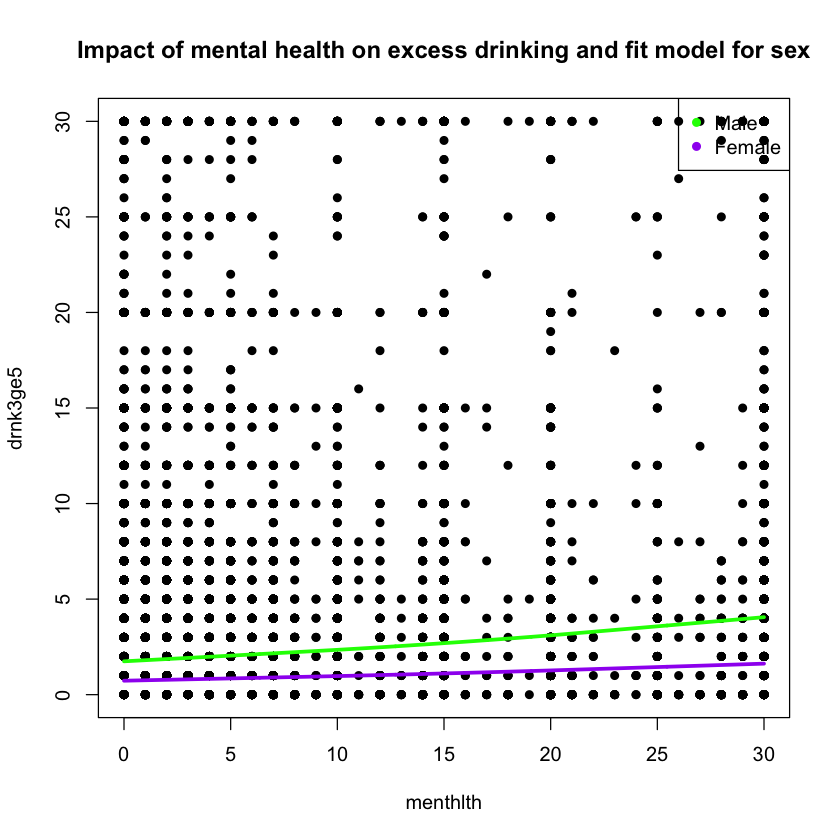

In [253]:
income_fit <- levels(poisson_data$income2)[ceiling(length(levels(poisson_data$income2))/2)]
df_1 <- expand.grid(income2 = income_fit, 
                    menthlth = seq(from = min(poisson_data$menthlth), to = max(poisson_data$menthlth), length.out = 100), 
                    marital = levels(poisson_data$marital), 
                    sex = levels(poisson_data$sex))
df_1$predicted <- predict(poisson_final, newdata = df_1, type = "response")

df_female <- subset(df_1, df_1$sex == "Female")
df_male <- subset(df_1, df_1$sex == "Male")
plot(drnk3ge5 ~ menthlth, data=poisson_data, pch=16, col="black"[as.factor(poisson_data$sex)],
    main = "Impact of mental health on excess drinking and fit model for sex")
lines(lowess(x=df_male$menthlth, y=df_male$pred), lty=1,lwd=3, col="green")
lines(lowess(x=df_female$menthlth,y= df_female$pred), lty=1,lwd=3, col="purple")
legend("topright", legend=c("Male", "Female"),
       col=c("green", "purple"), pch=16)

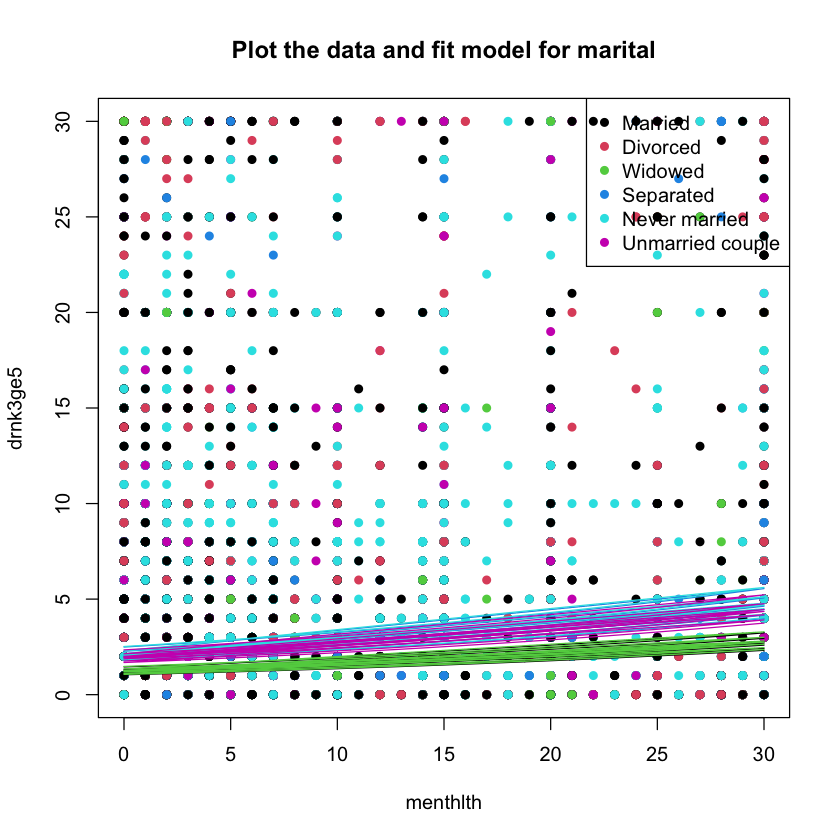

In [254]:
sex_fit <- levels(poisson_data$sex)[ceiling(length(levels(poisson_data$sex))/2)]
df_2 <- expand.grid(sex = sex_fit, 
                         menthlth = seq(from = min(poisson_data$menthlth), 
                                        to = max(poisson_data$menthlth), 
                                        length.out = 100), 
                         income2 = levels(poisson_data$income2), 
                         marital = levels(poisson_data$marital))
df_2$predicted <- predict(poisson_final, newdata = df_2, type = "response")

df_married <- subset(df_2, df_2$marital =="Married")
df_divorced <- subset(df_2, df_2$marital =="Divorsed")
df_widowed <- subset(df_2, df_2$marital =="Widowed")
df_separated <- subset(df_2, df_2$marital =="Separated")
df_never <- subset(df_2, df_2$marital =="Never married")
df_couple <- subset(df_2, df_2$marital =="A member of an unmarried couple")

plot(drnk3ge5 ~ menthlth, data=poisson_data, pch=16, col = c(1,2,3,4,5,6)[as.factor(poisson_data$marital)], 
    main = 'Plot the data and fit model for marital')
lines(df_married$menthlth, df_married$pred, lty=1, col=1)
lines(df_divorced$menthlth, df_divorced$pred, lty=1, col=2)
lines(df_widowed$menthlth, df_widowed$pred, lty=1, col=3)
lines(df_separated$menthlth, df_separated$pred, lty=1, col=4)
lines(df_never$menthlth, df_never$pred, lty=1, col=5)
lines(df_couple$menthlth, df_couple$pred, lty=1, col=6)
legend("topright", legend=c("Married", "Divorced", "Widowed", "Separated","Never married","Unmarried couple"),
       col=c(1,2,3,4,5,6), pch=16)

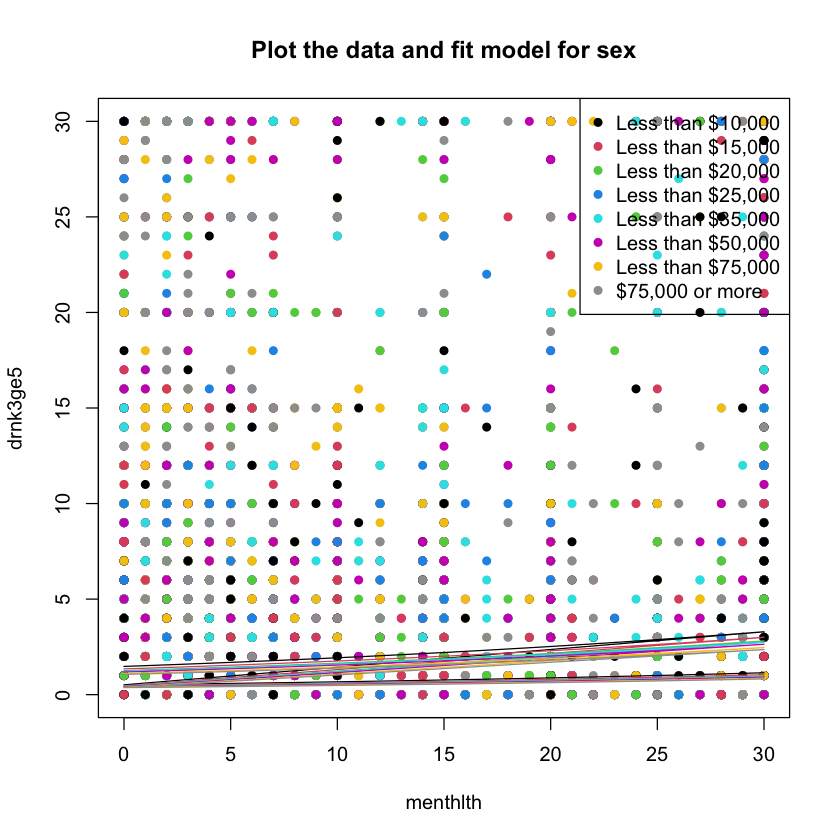

In [255]:
marital_fit <- levels(poisson_data$marital)[ceiling(length(levels(poisson_data$marital))/2)]
df_3 <- expand.grid(marital = marital_fit, 
                        menthlth = seq(from = min(poisson_data$menthlth), to = max(poisson_data$menthlth), length.out = 100), 
                        income2 = levels(poisson_data$income2), 
                        sex = levels(poisson_data$sex))
df_3$predicted <- predict(poisson_final, newdata = df_3, type = "response")

df_10000 <- subset(df_3, df_3$income2 =="Less than $10,000")
df_15000 <- subset(df_3, df_3$income2 =="Less than $15,000")
df_20000 <- subset(df_3, df_3$income2 =="Less than $20,000")
df_25000 <- subset(df_3, df_3$income2 =="Less than $25,000")
df_35000 <- subset(df_3, df_3$income2 =="Less than $35,000")
df_50000 <- subset(df_3, df_3$income2 =="Less than $50,000")
df_75000 <- subset(df_3, df_3$income2 =="Less than $75,000")
df_more <- subset(df_3, df_3$income2 =="$75,000 or more")


plot(drnk3ge5 ~ menthlth, data=poisson_data, pch=16, col = c(1,2,3,4,5,6,7,8)[as.factor(poisson_data$income2)],
    main = 'Plot the data and fit model for sex')
lines(df_10000$menthlth, df_10000$pred, lty=1, col=1)
lines(df_15000$menthlth, df_15000$pred, lty=1, col=2)
lines(df_20000$menthlth, df_20000$pred, lty=1, col=3)
lines(df_25000$menthlth, df_25000$pred, lty=1, col=4)
lines(df_35000$menthlth, df_35000$pred, lty=1, col=5)
lines(df_50000$menthlth, df_50000$pred, lty=1, col=6)
lines(df_75000$menthlth, df_75000$pred, lty=1, col=7)
lines(df_more$menthlth, df_more$pred, lty=1, col=8)
legend("topright", legend=c("Less than $10,000","Less than $15,000", "Less than $20,000", "Less than $25,000", "Less than $35,000", "Less than $50,000", "Less than $75,000", "$75,000 or more"),
       col=c(1,2,3,4,5,6,7,8), pch=16)

### What are the main results of the model?

According to our model's predictions, men have a higher tendency than women to consume larger amounts of alcoholic drinks (5 or more) and higher income individuals tend to consume such amounts more frequently, while holding other variables constant. Individuals with poorer mental health are also likely to have a higher frequency of consuming larger amounts of alcohol. Unlike the logistic regression, the Poisson regression predicts that individuals who have never been married are more likely to consume larger amounts of alcoholic drinks.

---
## Any concerns about the explanatory variables being related to each other? 


VIF values are relatively low, indicating there may not be a major issue with multicollinearity.
Multicollinearity involving the marital variable poses a challenge in isolating its unique impact on the response variable. This complexity arises from marital's involvement in various interaction terms with other variables, making it hard to discern its specific effect. Additionally, the interaction term marital:sex suggests that marital status's influence on the response variable might depend on gender, but it's unclear how much each variable contributes individually or in interaction. The high VIF for marital hints at significant multicollinearity with other explanatory variables, further complicating coefficient interpretation.

In [ ]:
library(car)
vif(poisson_final)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion
<div>


## Logistic model:

Our logistic regression model has produced valuable insights into the relationship between alcohol consumption and its associated factors, as it achieved the lowest AIC value and a relatively high AUC value compared to the alternative models. One of the key strengths of our model is that it includes an interaction term, allowing us to break down the effects of different variables and gain a better understanding of the relationship between categorical levels and alcohol consumption. 

However, our model has limitations that need to be addressed. Firstly, our AUC value was not high enough, indicating that our model may struggle to correctly identify true positives and could underestimate alcohol consumption. Secondly, we only included one quantitative variable as others had a non-linear relationship with the response variable and could cause severe multicollinearity. 

To address these limitations, we suggest several recommendations. First, we could identify and include more relevant quantitative variables in our model and increase the sample size to improve its accuracy. Secondly, we could merge some of the insignificant categorical levels to simplify the model and make it more user-friendly. By doing so, we can enhance the performance of our logistic regression model and obtain more precise insights into the relationship between alcohol consumption and its associated factors.


## Poisson model: 
Our logistic regression model shows that the response variable does not follow a Poisson distribution, resulting in larger AIC and deviance/df values for the best model, indicating that the model may not accurately represent the underlying data generating process.

The strength of the models lies in the inclusion of relevant factors, both categorical and quantitative, and the minimization of AIC and deviance/df by trying different models, including the creation of an interaction term to address collinearity issues caused by the "Marital" factor.

However, there are limitations to the models. Firstly, the Poisson regression model may not be the best fit for the response variable, resulting in inaccurate predictions. Secondly, the inclusion of only four factors may not be enough to accurately capture all factors that influence alcohol consumption.

To address these limitations, the models could be improved by exploring other types of models, such as multiple regression models. Additionally, collecting more data on factors such as age, religion, job status, and drinking history could improve the descriptive and predictive power of the models. Finally, including more explanatory variables in the models would enable the consideration of more factors and improve the accuracy of predictions.

<div class="alert alert-block alert-info">
<a id="AppendixA"></a>

# Appendix A:
# Building the Logistic Regression Model
</div>

In [256]:
full_model <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + sleptim1 + marital + educa + income2 + sex, data = mydata, family = "binomial"(link="logit"))
# summary(full_model)

In [257]:
model1 <- glm(alcday5_new ~ marital + physhlth + menthlth + poorhlth, data = mydata, family = "binomial"(link="logit"))
#summary(model1)
#AIC(model1)

In [258]:
model2 <- glm(alcday5_new ~ educa + physhlth + menthlth + poorhlth, data = mydata, family = "binomial"(link="logit"))
#summary(model2)
#AIC(model2)

In [259]:
model3 <- glm(alcday5_new ~ income2 + physhlth + menthlth + poorhlth, data = mydata, family = "binomial"(link="logit"))
#summary(model3)
#AIC(model3)

In [260]:
model4 <- glm(alcday5_new ~ sex + physhlth + menthlth + poorhlth, data = mydata, family = "binomial"(link="logit"))
#summary(model4)
#AIC(model4)

In [261]:
model5 <- glm(alcday5_new ~ physhlth + marital + sex + income2 + educa, data = mydata, family = "binomial"(link="logit"))
#summary(model5)
#AIC(model5)

In [262]:
model6 <- glm(alcday5_new ~ physhlth + marital + sex * income2 , data = mydata, family = "binomial"(link="logit"))
#summary(model6)
#AIC(model6)

In [263]:
model7 <- glm(alcday5_new ~ physhlth + marital + educa * income2 , data = mydata, family = "binomial"(link="logit"))
#summary(model7)
#AIC(model7)

In [264]:
model8 <- glm(alcday5_new ~ physhlth + marital + sex * educa , data = mydata, family = "binomial"(link="logit"))
#summary(model8)
#AIC(model)

In [265]:
model9 <- glm(alcday5_new ~ physhlth + marital * sex + income2, data = mydata, family = "binomial"(link="logit"))
#summary(model9)
#AIC(model9)

In [266]:
model10 <- glm(alcday5_new ~ physhlth + marital * income2 + sex, data = mydata, family = "binomial"(link="logit"))
#summary(model10)
#AIC(model10)

### Compare the AIC values for the models that you tried.

In [267]:
# create a data frame with AIC values for each model
logistic_aic <- data.frame(Model = paste0("p", 1:10),
                         AIC = c(AIC(model1), AIC(model2), AIC(model3), AIC(model4), AIC(model5), AIC(model6), AIC(model7), AIC(model8), AIC(model9), AIC(model10)))

print(logistic_aic)

   Model      AIC
1     p1 259844.4
2     p2 255591.1
3     p3 252094.0
4     p4 259538.3
5     p5 245770.1
6     p6 247501.9
7     p7 247886.1
8     p8 251296.2
9     p9 247587.8
10   p10 247221.6


<div class="alert alert-block alert-info">
<a id="AppendixB"></a>

# Appendix B:
# Building the Poisson Regression Model
</div>

In [268]:
poisson_final <- glm(drnk3ge5 ~  menthlth + sex*marital + income2, data = poisson_data, family = 'poisson'(link='log'))
# summary(poisson_final)

In [269]:
poisson_1 <- glm(drnk3ge5 ~ physhlth + sleptim1 + educa + income2, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_1)
#AIC(poisson_1)

In [270]:
poisson_2 <- glm(drnk3ge5 ~ physhlth + sleptim1 + educa + sex, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_2)
#AIC(poisson_2)

In [271]:
poisson_3 <- glm(drnk3ge5 ~ physhlth + marital + educa + sex, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_3) 
#AIC(poisson_3)

In [272]:
poisson_4 <- glm(drnk3ge5 ~ menthlth + marital + educa + sex, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_4) 
#AIC(poisson_4)

In [273]:
poisson_5 <- glm(drnk3ge5 ~ menthlth + sleptim1 + educa + sex, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_5) 
#AIC(poisson_5)

In [274]:
poisson_6 <- glm(drnk3ge5 ~ menthlth + sleptim1 + educa + income2, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_6) 
#AIC(poisson_6)

In [275]:
poisson_7 <- glm(drnk3ge5 ~ menthlth + income2 + marital*sex, data = poisson_data, family="poisson"(link="log"))
#summary(poisson_7) 
#AIC(poisson_7)

In [276]:
poisson_8 <- glm(drnk3ge5 ~ income2 + sex + marital*income2 , data = poisson_data, family="poisson"(link="log"))
#summary(poisson_8) 
#AIC(poisson_8)

### Compare the AIC values for the models that you tried.

In [277]:
# create a data frame with AIC values for each model
poisson_aic <- data.frame(Model = paste0("p", 1:8),
                         AIC = c(AIC(poisson_1), AIC(poisson_2), AIC(poisson_3), AIC(poisson_4), AIC(poisson_5), AIC(poisson_6), AIC(poisson_7), AIC(poisson_8)))

print(poisson_aic)

  Model      AIC
1    p1 520271.3
2    p2 503926.3
3    p3 493046.9
4    p4 485061.5
5    p5 494348.6
6    p6 513347.1
7    p7 489543.9
8    p8 498419.4
